# Tweet cleaning
* Import libraries and load dataset
* Clean tweet in preparation to classification task


In [1]:
#pip install demoji

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Text cleaning
import re, string
from stop_words import get_stop_words
import demoji

#nltk
import nltk
from nltk import ngrams
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator

#import spacy

In [3]:
df = pd.read_csv('../../data_collection/data/dataset_conc_iniziale.csv')

In [4]:
df = df.drop_duplicates()

C:\Users\Martina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


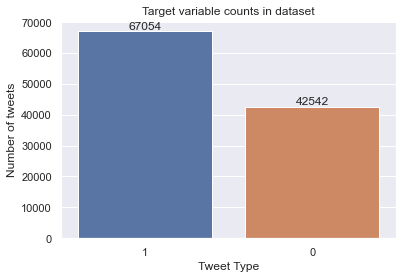

In [5]:
unique= df["tweet_label"].unique()
freq = df["tweet_label"].value_counts()
sns.set(font_scale = 1)

ax = sns.countplot(df["tweet_label"], 
                   order = df["tweet_label"].value_counts().index)
plt.title("Target variable counts in dataset")
plt.ylabel('Number of tweets')
plt.xlabel('Tweet Type')

# adding the text labels
rects = ax.patches
for rect, label in zip(rects, freq):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
plt.show()

## Tweet Cleaning

In [6]:
#DETERMINE ALL STOP WORDS
stop_words = get_stop_words('italian')
#stp_wrd = ['','r', 're', 'rt', 'bc', 'etc']

#stop_words.extend(stp_wrd)

#Remove punctuation, links, stopwords, mentions and \r\n new line characters
def strip_all_entities(text):
    text = re.sub(r"twit", "tweet", text)
    text = re.sub(r"http\S+", "", text) #remove links
    text = re.sub(r"#\S+","", text) #remove hashtags
    text = re.sub(r"(@\w+)", "" , text) #remove mentions
    text = text.replace('/', ' ') #remove "/"
    text = text.replace('\r', '').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"[^\w\d'\s]+",' ',text) #remove punctuaction
#     banned_list= string.punctuation #remove punctuation
#     table = str.maketrans('', '', banned_list)
#     text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)    
#     text =' '.join(word for word in text.split() if len(word) < 20) # remove words longer than 20 characters
    return text


#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the "#" symbol
def clean_hashtags(text):
    text = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', text)) #remove last hashtags
    text = " ".join(word.strip() for word in re.split('#|_', text)) #remove hashtags symbol from words in the middle of the sentence
    return text

#Filter special characters such as "&" and "$" present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

#Remove multiple sequential spaces
def remove_mult_spaces(text):
    return re.sub("\s\s+" , " ", text)

#Clean emoticons from text
def emoticon_remove(text):
    dem = demoji.findall(text)
    for i in dem.keys():
        dem[i]= re.sub(r' ', "_", dem[i])
        text =  text.replace(i, dem[i])
    return text

In [7]:
#Then we apply all the defined functions in the following order
def preprocess(text):
    #text = re.sub(r"'", "_ ", text)
    text = strip_all_entities(text)
    text = filter_chars(text)
    text = re.sub(r'\W*\b\w{1,1}\b', '', text)
    text = remove_mult_spaces(text)
    text = emoticon_remove(text)
    return text

In [8]:
df['text_clean'] = df['Tweet'].apply(lambda x: preprocess(x))

In [9]:
#TOKENIZATION
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['text_clean'].apply(lambda x: tokenization(x))
df['tokenized_bigram'] = df['Tweet_tokenized'].apply(lambda words: list(nltk.ngrams(words, 2)))

In [10]:
df

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,Tweet,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,tweet_label,text_clean,Tweet_tokenized,tokenized_bigram
0,MonicaPicca1,False,2022-08-28 08:26:17+00:00,383,433,56,it,2022-08-31 17:40:39+00:00,129,Twitter for Android,"A #Lampedusa stavolta non hanno potuto""nascond...","['Lampedusa', 'blitz', 'hotspot', 'Business', ...",1565031828691509248,NaN,NaN,NaN,1,stavolta potuto nascondere polvere tappeto riv...,"[stavolta, potuto, nascondere, polvere, tappet...","[(stavolta, potuto), (potuto, nascondere), (na..."
1,mau__ro,False,2019-06-15 08:01:41+00:00,465,431,0,it,2022-08-31 16:34:15+00:00,1,Twitter Web App,"Hanno descritto le loro lotte quotidiane, ment...","['SanctionIsrael', 'RestiamoUmani', 'NoWar', '...",1565015032135663618,https://twitter.com/mau__ro,NaN,NaN,1,descritto lotte quotidiane mentre affrontano l...,"[descritto, lotte, quotidiane, mentre, affront...","[(descritto, lotte), (lotte, quotidiane), (quo..."
2,mau__ro,False,2019-06-15 08:01:41+00:00,465,431,1,it,2022-08-31 15:01:15+00:00,3,Twitter Web App,"#RestiamoUmani\n\n#KhalilAwawdeh, in sciopero ...","['RestiamoUmani', 'KhalilAwawdeh', 'Detenzione...",1564991713273413632,NaN,NaN,NaN,1,sciopero fame 170giorni pesa 38kg soffre dispn...,"[sciopero, fame, 170giorni, pesa, 38kg, soffre...","[(sciopero, fame), (fame, 170giorni), (170gior..."
3,frmango65,False,2013-04-18 08:39:52+00:00,2030,2163,0,it,2022-08-31 10:16:41+00:00,0,Twitter for Android,Solidarietà #portiaperti in tutta #europa: #sp...,"['portiaperti', 'europa', 'spagna', 'Francia',...",1564920099156418560,NaN,NaN,NaN,1,solidarietà tutta,"[solidarietà, tutta]","[(solidarietà, tutta)]"
4,whyALWAYSjump9,False,2021-08-14 19:53:45+00:00,346,304,0,it,2022-08-31 10:07:55+00:00,0,Twitter for iPhone,@_mediocretes Ma si può definire casi umani qu...,['restiamoumani'],1564897161522954240,https://twitter.com/_mediocretes,NaN,NaN,1,può definire casi umani,"[può, definire, casi, umani]","[(può, definire), (definire, casi), (casi, uma..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109591,peccalo,False,2012-01-16 16:20:55+00:00,23,15,0,it,2018-09-01 09:18:43+00:00,0,Twitter for iPhone,@matteosalvinimi per la memoria #tolleranzazer...,"['tolleranzazero', 'portichiusi', 'nessunotocc...",1035819227180163072,NaN,NaN,NaN,0,memoria futuro potrebbe essere contagioso,"[memoria, futuro, potrebbe, essere, contagioso]","[(memoria, futuro), (futuro, potrebbe), (potre..."
109592,Vanni_Valenti,False,2018-07-14 07:35:20+00:00,526,1288,2,it,2018-09-01 08:29:24+00:00,2,Twitter Web Client,"@1Natsu01 Di nuovo, non è difficile: IL NAUFRA...","['portichiusi', 'BloccoNavaleSubito']",1034894468779044867,https://twitter.com/1Natsu01,NaN,NaN,0,nuovo difficile naufrago' soggetto diverso dal...,"[nuovo, difficile, naufrago, soggetto, diverso...","[(nuovo, difficile), (difficile, naufrago), (n..."
109593,Vanni_Valenti,False,2018-07-14 07:35:20+00:00,526,1288,1,it,2018-09-01 08:17:44+00:00,0,Twitter Web Client,@1Natsu01 Leggi la Convenzione di Montego Bay ...,"['BloccoNavaleSubito', 'portichiusi']",1034894468779044867,https://twitter.com/1Natsu01,NaN,NaN,0,leggi convenzione montego bay diritto mare art...,"[leggi, convenzione, montego, bay, diritto, ma...","[(leggi, convenzione), (convenzione, montego),..."
109594,SenatoreF,False,2013-01-12 13:34:41+00:00,727,697,0,it,2018-09-01 08:03:08+00:00,1,Twitter Web App,@matteosalvinimi @fattoquotidiano @matteorenzi...,"['salvini', 'portichiusi']",1035212715747356672,https://twitter.com/matteosalvinimi,NaN,NaN,0,gallocedrone soli 117 poveri migranti stremat...,"[, gallocedrone, soli, 117, poveri, migranti, ...","[(, gallocedrone), (gallocedrone, soli), (soli..."


In [11]:
#WORDS FREQUENCY ALL
text = list()
for tweet in df['Tweet_tokenized']:
    for el in tweet:
        if el not in stop_words:
            text.append(el)
    
freq_dist = nltk.FreqDist(text)

freq_dist.most_common(20)

[('italia', 7243),
 ('solo', 6779),
 ('', 5169),
 ('sempre', 4843),
 ('essere', 4795),
 ('persone', 4596),
 ('grazie', 4383),
 ('italiani', 4276),
 ('fa', 3967),
 ('mare', 3870),
 ('migranti', 3849),
 ('quando', 3810),
 ('poi', 3668),
 ('cosa', 3635),
 ('governo', 3607),
 ('salvini', 3530),
 ('porti', 3362),
 ('umani', 3318),
 ('mai', 3276),
 ('così', 3259)]

In [12]:
#WORDS FREQUENCY LABEL 1-PRO
text = list()
subset_pro = df[df['tweet_label']==1]

for tweet in subset_pro.Tweet_tokenized:
    for el in tweet:
        if el not in stop_words:
            text.append(el)
    
freq_dist = nltk.FreqDist(text)

freq_dist.most_common(20)

[('solo', 3704),
 ('persone', 3652),
 ('grazie', 3472),
 ('essere', 3405),
 ('', 3372),
 ('sempre', 3012),
 ('umani', 2696),
 ('mare', 2661),
 ('umanità', 2606),
 ('italia', 2485),
 ('fa', 2471),
 ('oggi', 2378),
 ('quando', 2331),
 ('cosa', 2199),
 ('migranti', 2132),
 ('poi', 2000),
 ('mai', 1921),
 ('così', 1907),
 ('vita', 1833),
 ('ogni', 1824)]

In [13]:
#WORDS FREQUENCY _ 1Gram e 2Gram

bigram_pro = list()
for tweet in subset_pro['Tweet_tokenized']:
    for i in range (0, len(tweet)-1):
        if (tweet[i] not in stop_words) & (tweet[i+1] not in stop_words):
            bigram_pro.append((tweet[i], tweet[i+1]))
    
big_freq_pro = nltk.FreqDist(bigram_pro)

big_freq_pro.most_common(20)

[(('esseri', 'umani'), 855),
 (('vite', 'umane'), 406),
 (('restiamo', 'umani'), 401),
 (('ogni', 'giorno'), 401),
 (('diritti', 'umani'), 376),
 (('porto', 'sicuro'), 313),
 (('salvare', 'vite'), 308),
 (('vittorio', 'arrigoni'), 297),
 (('essere', 'umano'), 265),
 (('donne', 'bambini'), 264),
 (('nessuno', 'escluso'), 222),
 (('può', 'essere'), 220),
 (('sea', 'watch'), 218),
 (('anni', 'fa'), 204),
 (('essere', 'umani'), 200),
 (('restare', 'umani'), 183),
 (('firma', 'petizione'), 183),
 (('altra', 'parte'), 181),
 (('mezzo', 'mare'), 180),
 (('morti', 'mare'), 176)]

In [14]:
#WORDS FREQUENCY LABEL -1 contro
text = list()
subset_contro = df[df['tweet_label']==0]

for tweet in subset_contro.Tweet_tokenized:
    for el in tweet:
        if el not in stop_words:
            text.append(el)
            
freq_dist = nltk.FreqDist(text)

freq_dist.most_common(20)

[('italia', 4758),
 ('solo', 3075),
 ('italiani', 2857),
 ('porti', 2441),
 ('salvini', 2192),
 ('clandestini', 2171),
 ('governo', 2119),
 ('sempre', 1831),
 ('', 1797),
 ('ong', 1751),
 ('migranti', 1717),
 ('basta', 1691),
 ('poi', 1668),
 ('ora', 1656),
 ('fa', 1496),
 ('quando', 1479),
 ('cosa', 1436),
 ('essere', 1390),
 ('mai', 1355),
 ('così', 1352)]

In [15]:
#WORDS FREQUENCY _ 1Gram e 2Gram

bigram_contro = list()
for tweet in subset_contro['Tweet_tokenized']:
    for i in range (0, len(tweet)-1):
        if (tweet[i] not in stop_words) & (tweet[i+1] not in stop_words):
            bigram_contro.append((tweet[i], tweet[i+1]))
    
big_freq_contro = nltk.FreqDist(bigram_contro)

big_freq_contro.most_common(20)

[(('porti', 'chiusi'), 447),
 (('esseri', 'umani'), 432),
 (('porti', 'aperti'), 368),
 (('immigrazione', 'clandestina'), 289),
 (('sea', 'watch'), 244),
 (('porto', 'sicuro'), 239),
 (('avanti', 'tutta'), 235),
 (('guardia', 'costiera'), 194),
 (('avanti', 'così'), 177),
 (('trafficanti', 'esseri'), 169),
 (('popolo', 'italiano'), 166),
 (('acque', 'territoriali'), 158),
 (('open', 'arms'), 157),
 (('chiudere', 'porti'), 152),
 (('matteo', 'salvini'), 147),
 (('solo', 'italia'), 144),
 (('morti', 'mare'), 144),
 (('vuol', 'dire'), 137),
 (('va', 'bene'), 135),
 (('', 'italia'), 128)]

In [16]:
text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)

In [17]:
df['text_len'] = text_len

In [18]:
df

,User,verified,Date_Created,Follows_Count,Friends_Count,Retweet_Count,Language,Date_Tweet,Number_of_Likes,Source_of_Tweet,...,Hashtags,Conversation_Id,In_reply_To,Coordinates,Place,tweet_label,text_clean,Tweet_tokenized,tokenized_bigram,text_len
0,MonicaPicca1,False,2022-08-28 08:26:17+00:00,383,433,56,it,2022-08-31 17:40:39+00:00,129,Twitter for Android,...,"['Lampedusa', 'blitz', 'hotspot', 'Business', ...",1565031828691509248,NaN,NaN,NaN,1,stavolta potuto nascondere polvere tappeto riv...,"[stavolta, potuto, nascondere, polvere, tappet...","[(stavolta, potuto), (potuto, nascondere), (na...",11
1,mau__ro,False,2019-06-15 08:01:41+00:00,465,431,0,it,2022-08-31 16:34:15+00:00,1,Twitter Web App,...,"['SanctionIsrael', 'RestiamoUmani', 'NoWar', '...",1565015032135663618,https://twitter.com/mau__ro,NaN,NaN,1,descritto lotte quotidiane mentre affrontano l...,"[descritto, lotte, quotidiane, mentre, affront...","[(descritto, lotte), (lotte, quotidiane), (quo...",11
2,mau__ro,False,2019-06-15 08:01:41+00:00,465,431,1,it,2022-08-31 15:01:15+00:00,3,Twitter Web App,...,"['RestiamoUmani', 'KhalilAwawdeh', 'Detenzione...",1564991713273413632,NaN,NaN,NaN,1,sciopero fame 170giorni pesa 38kg soffre dispn...,"[sciopero, fame, 170giorni, pesa, 38kg, soffre...","[(sciopero, fame), (fame, 170giorni), (170gior...",12
3,frmango65,False,2013-04-18 08:39:52+00:00,2030,2163,0,it,2022-08-31 10:16:41+00:00,0,Twitter for Android,...,"['portiaperti', 'europa', 'spagna', 'Francia',...",1564920099156418560,NaN,NaN,NaN,1,solidarietà tutta,"[solidarietà, tutta]","[(solidarietà, tutta)]",2
4,whyALWAYSjump9,False,2021-08-14 19:53:45+00:00,346,304,0,it,2022-08-31 10:07:55+00:00,0,Twitter for iPhone,...,['restiamoumani'],1564897161522954240,https://twitter.com/_mediocretes,NaN,NaN,1,può definire casi umani,"[può, definire, casi, umani]","[(può, definire), (definire, casi), (casi, uma...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109591,peccalo,False,2012-01-16 16:20:55+00:00,23,15,0,it,2018-09-01 09:18:43+00:00,0,Twitter for iPhone,...,"['tolleranzazero', 'portichiusi', 'nessunotocc...",1035819227180163072,NaN,NaN,NaN,0,memoria futuro potrebbe essere contagioso,"[memoria, futuro, potrebbe, essere, contagioso]","[(memoria, futuro), (futuro, potrebbe), (potre...",5
109592,Vanni_Valenti,False,2018-07-14 07:35:20+00:00,526,1288,2,it,2018-09-01 08:29:24+00:00,2,Twitter Web Client,...,"['portichiusi', 'BloccoNavaleSubito']",1034894468779044867,https://twitter.com/1Natsu01,NaN,NaN,0,nuovo difficile naufrago' soggetto diverso dal...,"[nuovo, difficile, naufrago, soggetto, diverso...","[(nuovo, difficile), (difficile, naufrago), (n...",22
109593,Vanni_Valenti,False,2018-07-14 07:35:20+00:00,526,1288,1,it,2018-09-01 08:17:44+00:00,0,Twitter Web Client,...,"['BloccoNavaleSubito', 'portichiusi']",1034894468779044867,https://twitter.com/1Natsu01,NaN,NaN,0,leggi convenzione montego bay diritto mare art...,"[leggi, convenzione, montego, bay, diritto, ma...","[(leggi, convenzione), (convenzione, montego),...",26
109594,SenatoreF,False,2013-01-12 13:34:41+00:00,727,697,0,it,2018-09-01 08:03:08+00:00,1,Twitter Web App,...,"['salvini', 'portichiusi']",1035212715747356672,https://twitter.com/matteosalvinimi,NaN,NaN,0,gallocedrone soli 117 poveri migranti stremat...,"[, gallocedrone, soli, 117, poveri, migranti, ...","[(, gallocedrone), (gallocedrone, soli), (soli...",18


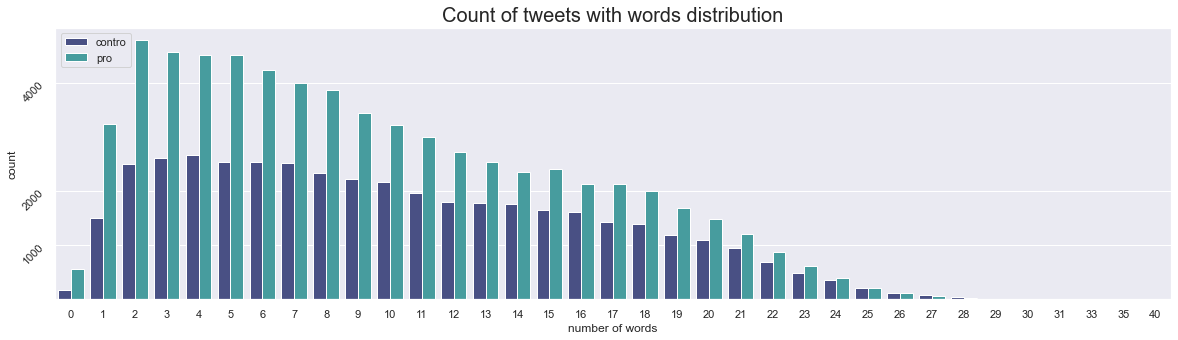

In [19]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df['text_len'], hue=df['tweet_label'], palette='mako')
plt.title('Count of tweets with words distribution', fontsize=20)
plt.legend(['contro', 'pro'])
plt.yticks([1000, 2000, 4000], ['1000', '2000', '4000'],rotation=45)
plt.ylabel('count')
plt.xlabel('number of words')
plt.show()

In [20]:
df.to_csv("../../data_collection/data/cleaned_tweet.csv")

In [21]:
#da rivedere distribuzione tweet